# Distribuições Discretas

## Carregar módulos

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson

## Carregar dados

In [ ]:
dados = pd.read_csv('acidentes.csv')

In [ ]:
dados.head()

id_acidente data_acidente              tipo_lesao risco_classificacao
0            1    2014-02-11               Laceração                Leve
1            2    2014-02-05  Ferimentos Perfurantes               Médio
2            3    2014-01-31                Contusão                Leve
3            4    2014-01-13                   Corte                Leve
4            5    2014-02-14                Contusão               Médio

## Histograma

- Preparar os dados

In [ ]:
dados['data_acidente'] = pd.to_datetime(dados['data_acidente'], errors='coerce')

In [ ]:
dados['data_acidente_mensal'] = dados['data_acidente'].dt.strftime('%Y-%m')

In [ ]:
dados_acidentes_mensal = dados.groupby('data_acidente_mensal') \
                              .size() \
                              .to_frame('n') \
                              .reset_index()

In [ ]:
dados_acidentes_mensal.head()

data_acidente_mensal   n
0              2013-07   1
1              2014-01  15
2              2014-02  12
3              2014-03  11
4              2014-04  10

- Exemplo matplotlib

Text(0, 0.5, 'Frequencia')

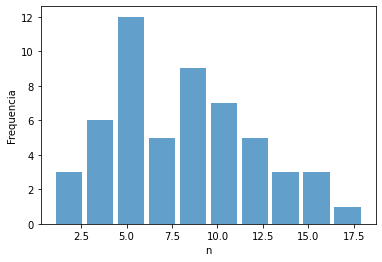

In [ ]:
plt.hist(dados_acidentes_mensal['n'], alpha=0.7, rwidth=0.85)
plt.xlabel('n')
plt.ylabel('Frequencia')

- Exemplo seaborn

Text(0.29999999999999716, 0.5, 'Frequencia')

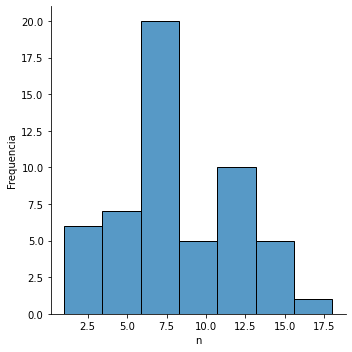

In [ ]:
sns.displot(dados_acidentes_mensal['n'])
plt.ylabel('Frequencia')

## Simulação

### Distribuição Uniforme

In [ ]:
n = 6
p = 1/n

In [ ]:
resultados = np.arange(1, 7)

In [ ]:
probabilidade = np.repeat(p, n)

In [ ]:
dados_uniforme = pd.DataFrame(resultados, columns=['resultados'])
dados_uniforme['probabilidade'] = probabilidade

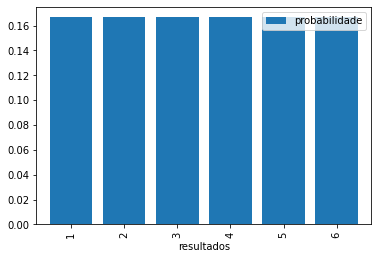

In [ ]:
dados_uniforme.plot(kind = 'bar', 
                    x = 'resultados', 
                    y = 'probabilidade', width = 0.8)

### Distribuição Bernoulli 

In [ ]:
p = 0.2

In [ ]:
resultados = np.arange(0, 2)

In [ ]:
probabilidade = np.array([p, 1-p])

In [ ]:
dados_bernoulli = pd.DataFrame(resultados, columns=['resultados'])
dados_bernoulli['probabilidade'] = probabilidade

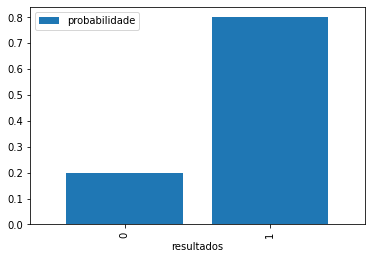

In [ ]:
dados_bernoulli.plot(kind = 'bar', 
                     x = 'resultados', 
                     y = 'probabilidade', width = 0.8)

### Distribuição Binomial

In [ ]:
n = 5
p = 0.8

In [ ]:
n_sucessos = [i for i in range(n+1)]

In [ ]:
dados_binomial = pd.DataFrame(n_sucessos, columns=['n_sucessos'])

In [ ]:
dados_binomial['probs'] = dados_binomial['n_sucessos'].apply(lambda x: binom.pmf(k=x, n = n, p = p))

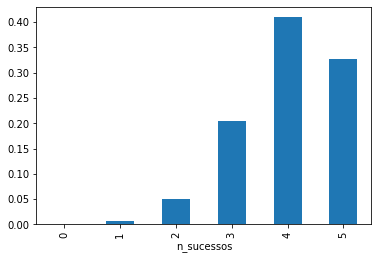

In [ ]:
dados_binomial.plot(kind='bar', 
                    x = 'n_sucessos', 
                    y = 'probs', 
                    legend = None)

### Distribuição Poisson

In [ ]:
n = 15
mu = 2

In [ ]:
resultados = [i for i in range(n+1)]

In [ ]:
dados_poisson = pd.DataFrame(resultados, columns=['n_sucessos'])

In [ ]:
dados_poisson['probs'] = dados_poisson['n_sucessos'].apply(lambda x: poisson.pmf(k=x, mu=mu))

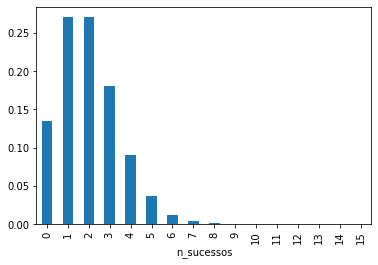

In [ ]:
dados_poisson.plot(kind='bar', 
                   x = 'n_sucessos', 
                   y = 'probs', 
                   legend = None)